In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
 #Ingestamos la data que tenemos en un csv
df_train = pd.read_csv('hospitalizaciones_train.csv')
df_train.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9


In [3]:
df_test = pd.read_csv('df_test_proc.csv')
df_test.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [5]:
df_test.head(2)

,habitaciones_disp,area,doctor,personal_disp,visitas,seguro,deposito,gravedad_enc,edad_enc
0,3,2,4,10,2,0,4749.640225,1.0,2.0
1,2,0,1,4,2,1,4122.261324,1.0,5.0


***

#### Exploración 
Obtenemos un pantallazo del mismo

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [7]:
#Obtenemos un resumen estadistico de las variables numericas del dataframe
df_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


***

##### Tratamiento valores faltantes y duplicados

In [6]:
#Eliminamos los duplicados, aunque verificamos que no hay ninguno
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

In [168]:
#Vemos la cantidad de nulos por columna, pero no hay ninguno
#Si los hubiera, podriamos utilizar ciertas librerias que tienen como fin  facilitar el tratamiento de los mismos
df_train.isna().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

***

##### Renombramos columnas
Para facilitar el manejo de las variables

In [4]:
df_train.columns = ['habitaciones_disp', 'area', 'codigo ', 'doctor','personal_disp','id_paciente','edad','genero','tipo_ingreso','gravedad','condiciones','visitas','seguro','deposito','dias_estadia']

##### Creación de la variable target(objetivo)
La cual va a ser 1 en caso de que la estadia sea larga(mayor a 8 dias) o 0 si es corta(8 dias o menos)

In [5]:
#Asignamos 0 si la estadia es corta(<= 8) y 1 si es larga, la cual va a ser nuestra variable target y la nombramos de esa forma
df_train['target'] = np.where(df_train['dias_estadia']<=8, '0', '1')

##### Búsqueda y tratamiento de outliers
Pueden aparecer por un valor cargado incorrectamente o por trabajar con poblaciones heterogéneas y de gran dispersión.

<AxesSubplot: title={'center': 'Boxplot de la variable habitaciones disponibles'}, xlabel='target', ylabel='habitaciones_disp'>

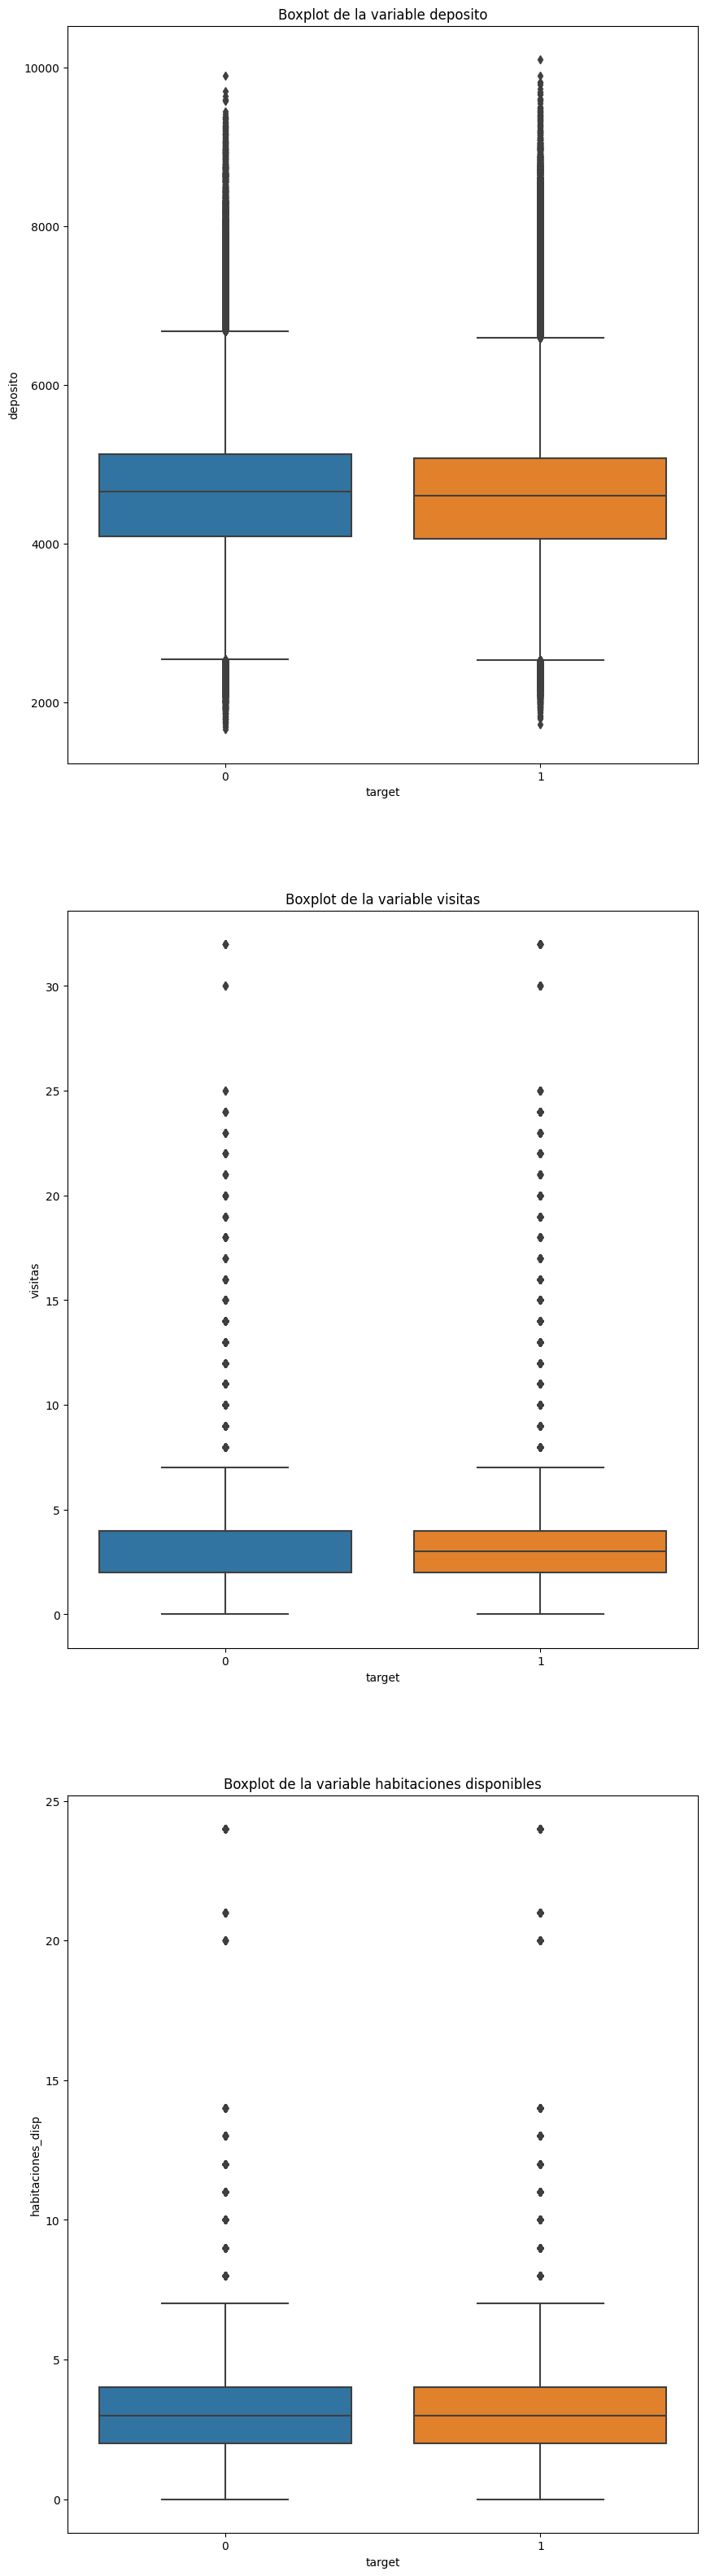

In [13]:
#Utilizamos el grafico de caja y bigotes, que con su simpleza nos muestra un monton de informacion de la variable. (Media, mediana, otliers, donde se concentrtan los datos)

plt.figure(figsize = (10,40))

plt.subplot(3,1,1)
plt.title('Boxplot de la variable deposito')
sns.boxplot(x = df_train['target'], y= df_train['deposito'])

plt.subplot(3,1,2)
plt.title('Boxplot de la variable visitas')
sns.boxplot(x = df_train['target'], y= df_train['visitas'])

plt.subplot(3,1,3)
plt.title('Boxplot de la variable habitaciones disponibles')
sns.boxplot(x = df_train['target'], y= df_train['habitaciones_disp'])

Observamos que en todas estas variables hay outliers, que son los puntos que estan fuera de los bigotes(o brazos, hay varias formas en las que se conoce a este modelo de caja).
De todas formas, en el caso de la variable 'deposito' decidí no eliminarlos, por una cuestión de que es factible que existan esos valores porque hay distintos tipos de internaciones que no tienen el mismo costo.
En este caso, decidí no tratar los valores atípicos sino unicamente identificarlos, pero si procedieras a eliminarlos porque crees que pueden afectar tu análisis, podes utilizar por ejemplo la regla del rango intercuartilico. Acá un ejemplo:

In [14]:
#Contamos cuantos outliers hay en esta variable visitas
Q1 = df_train['visitas'].quantile(0.25)
Q3 = df_train['visitas'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print('Cantidad de registros totales:', df_train.shape[0])
print('Cantidad de outliers:', df_train[(df_train['visitas']<BI) | (df_train['visitas']>BS)].shape[0] )


Cantidad de registros totales: 410000
Cantidad de outliers: 20163


In [15]:
out_visitas = (df_train['visitas']<BI) | (df_train['visitas']>BS) 

df_sin_outliers = df_train[~out_visitas] #El df original sin  el df de los outliers

##### Escalado de los datos

In [16]:
#Importamos el métoido que utilizamos para escalar

from sklearn.preprocessing import StandardScaler



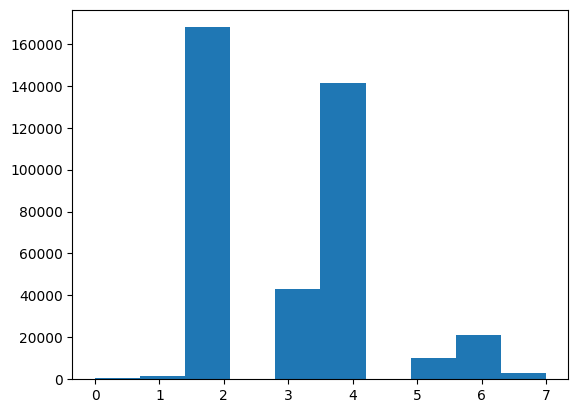

In [17]:
#Observamos su actual distribución
plt.hist(df_sin_outliers['visitas']) 
plt.show()

C:\Users\homer\AppData\Local\Temp\ipykernel_9048\431036169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['visitas'] = scaler.transform(df_sin_outliers[['visitas']])


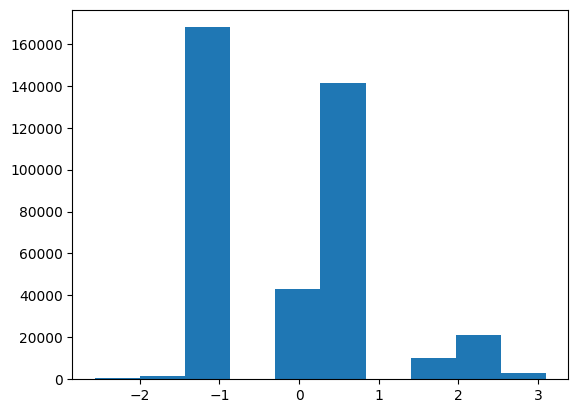

In [55]:
#Procedemos a escalar y observar su nueva distribucion, que ahora va a ser de media 0 y desviacion estandar 1
scaler = StandardScaler()

scaler.fit(df_sin_outliers[['visitas']])

df_sin_outliers['visitas'] = scaler.transform(df_sin_outliers[['visitas']])

plt.hist(df_sin_outliers['visitas']) 
plt.show()

Viendo el gráfico, notamos que tenemos media 0 y desviacion estandar 1. No apliqué el escalado a las demás variables porque este es sensible a las outliers, y como vimos antes tenemos muchos valores atipicos en algunas variables.

#### Distribución de variables respecto a la variable target

De acá, como habiamos anticipado despues del pairplot, notamos que hay varias observaciones tales como:

-Area: en los casos de 'anesthesia' y 'surgery', solo se presentan casos de estadias largas

-Doctor: 2 de los doctores siempre derivan en casos de estadia larga(Simon y Isaac)

-Edad: cuando ingresa gente de 0 a 10, y gente mayor de 50, solo hay casos en los que la estadia es larga

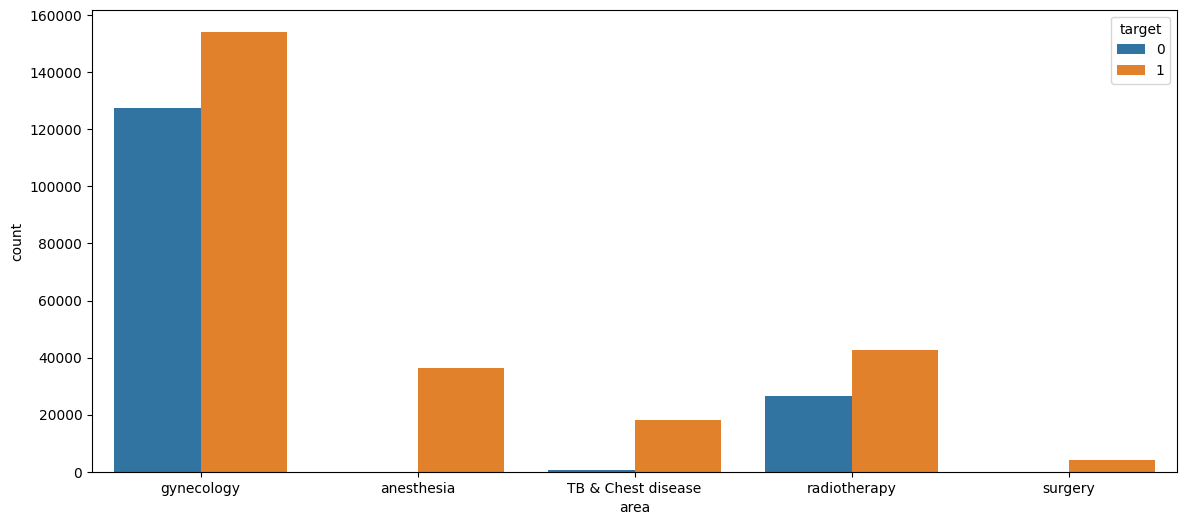

In [25]:
#Graficamos un countplot para ver cada tipo de la variable area, cuantos casos cumplen con la vble target y cuantos no
plt.figure(figsize=(14, 6))
sns.countplot(x=df_train['area'], hue = df_train['target'])

plt.show()

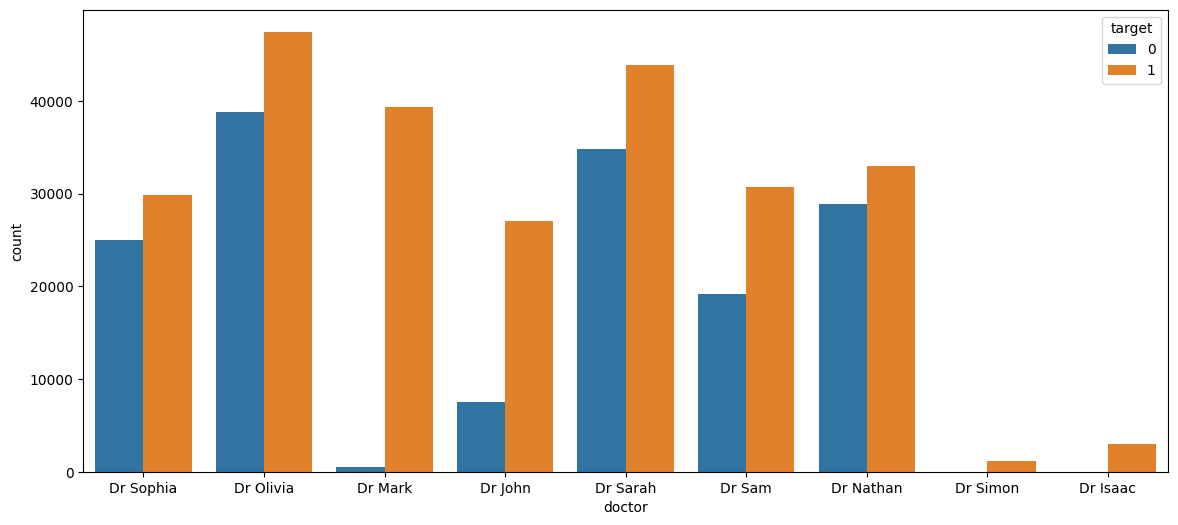

In [26]:
plt.figure(figsize=(14, 6))

sns.countplot(x=df_train['doctor'], hue = df_train['target'])

plt.show()

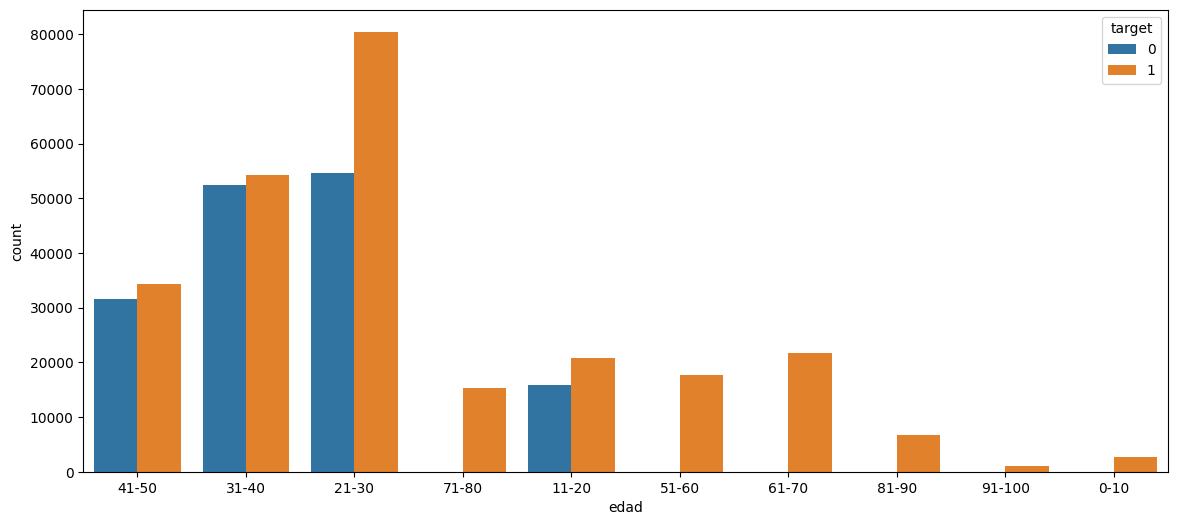

In [27]:
plt.figure(figsize=(14, 6))

sns.countplot(x=df_train['edad'], hue = df_train['target'])

plt.show()

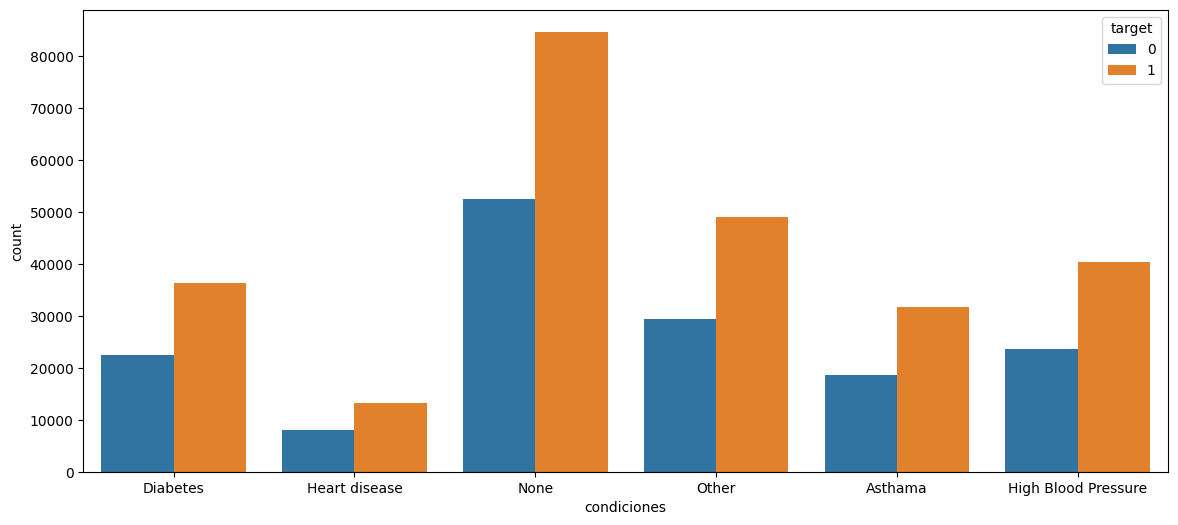

In [35]:
plt.figure(figsize=(14, 6))

sns.countplot(x=df_train['condiciones'], hue = df_train['target'])

plt.show()

***

#### Normalizacion de variables categóricas
Vemos que tenemos muchas variables categóricas(area,genero, tipo de ingreso, gravedad, condiciones y seguro).

In [28]:
df_train.head(3)

,habitaciones_disp,area,codigo,doctor,personal_disp,id_paciente,edad,genero,tipo_ingreso,gravedad,condiciones,visitas,seguro,deposito,dias_estadia,target
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0


In [14]:
#Convertimos la variable seguro en 0 si no tiene seguro, y en 1 si tiene seguro.
df_train['seguro'] = np.where(df_train['seguro'] == 'Yes', '1', '0')
df_train.head(4)

,habitaciones_disp,area,doctor,personal_disp,visitas,seguro,deposito,target,gravedad_enc,edad_enc
0,4,2,8,0,4,1,2966.408696,0,2.0,4.0
1,4,2,8,2,2,0,3554.835677,1,0.0,3.0
2,2,2,8,8,2,1,5624.733654,0,2.0,2.0
3,4,2,4,7,4,0,4814.149231,0,1.0,3.0


In [9]:
#Vemos los valores unicos de cada variable, para ver con que nos encontramos
print(df_train.area.unique())
print(df_train.doctor.unique())
print(df_train.edad.unique())
print(df_train.tipo_ingreso.unique())
print(df_train.gravedad.unique())
print(df_train.condiciones.unique())
print(df_train.genero.unique())

['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']
['Trauma' 'Urgent' 'Emergency']
['Extreme' 'Minor' 'Moderate']
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']
['Female' 'Male' 'Other']


#### Utilizo el labelEncoder para algunas variables

In [6]:
#Creamos el codificador, y lo aplicamos a las variables Nominales
le = LabelEncoder()

df_train['area'] = le.fit_transform(df_train['area'])
df_train['doctor'] = le.fit_transform(df_train['doctor'])

#### Asignamos mediante el metodo OrdinalEncoder a las vbles ordinales, un valor teniendo en cuenta su orden. Las cuales son edad y gravedad

In [7]:
# Creamos el codificador, y le asignamos un orden a las variables
encoder = OrdinalEncoder(categories=[['Minor','Moderate', 'Extreme']])
encoder_edad = OrdinalEncoder(categories=[['0-10','11-20', '21-30', '31-40' ,'41-50' ,'51-60', '61-70', '71-80','81-90', '91-100']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df_train[["gravedad"]])
encoder_edad.fit(df_train[["edad"]])
df_train["gravedad_enc"] = encoder.transform(df_train[["gravedad"]])
df_train["edad_enc"] = encoder_edad.transform(df_train[["edad"]])

In [8]:
#Elimino las variables que a mi parecer van a afectar mi analisis. Dificil que el id de un paciente pueda influir en la duracion de su estadia
df_train.drop(df_train.columns[[2,5,6,7,8,9,10,14]], axis = 1, inplace=True)

In [9]:
df_train.columns

Index(['habitaciones_disp', 'area', 'doctor', 'personal_disp', 'visitas',
       'seguro', 'deposito', 'target', 'gravedad_enc', 'edad_enc'],
      dtype='object')

In [238]:
#Hacer el pairplot con menos variables, total despues los modelos los trabajamos con todas
sns.pairplot(df_train, hue="target", palette = ['r', 'g'])
plt.show()

***

### Visualización de los datos

#### Pairplot
Hacemos un pairplot para poder identificar relaciones de algunas variables

In [ ]:
df_pair = df_train['doctor', ' habitaciones_disp','personal_disp', 'edad','gravedad']

c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: U

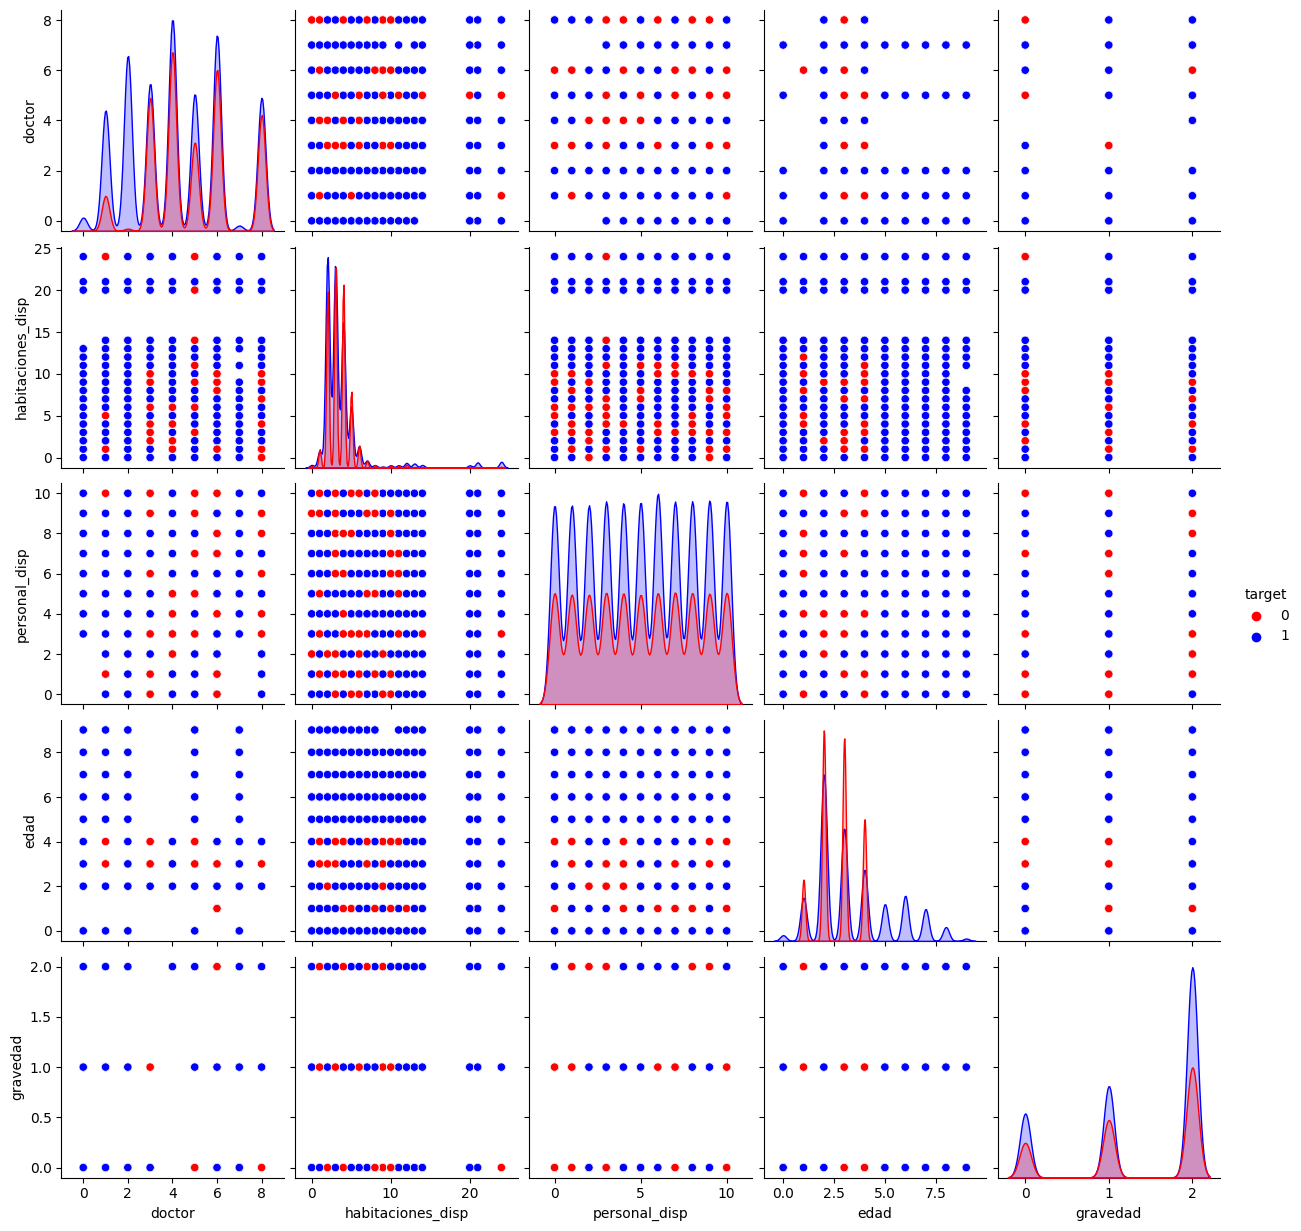

In [15]:
sns.pairplot(df_pair, hue="target", palette = ['r', 'b', 'g'])
plt.show()

#### Observaciones
A simple vista podemos notar:

-Los que estan arriba de edad 50, son todos casos que cumplen con el target

-Cuando personal>5 son todos casos de estadias largas

-Cuando hay muchas habitaciones disponibles, la estadia va a ser larga

-En area, en los casos (0,1,4) solo hay casos en los que la estadia es larga

-Los doctores (0,2,7) tienen solo casos en los que la estadia es larga, los demas indiferentes

-Caso gravedad parece ser indiferente, pero como todo el dataset hay mas casos de estadia q cumplen con el target

#### Matriz de correlación
Esta matriz nos facilita sacar deducciones con respecto a si hay correlaciones fuertes o debiles entre algunas variables. Pero observamos que no hay muchos indicios.

In [244]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

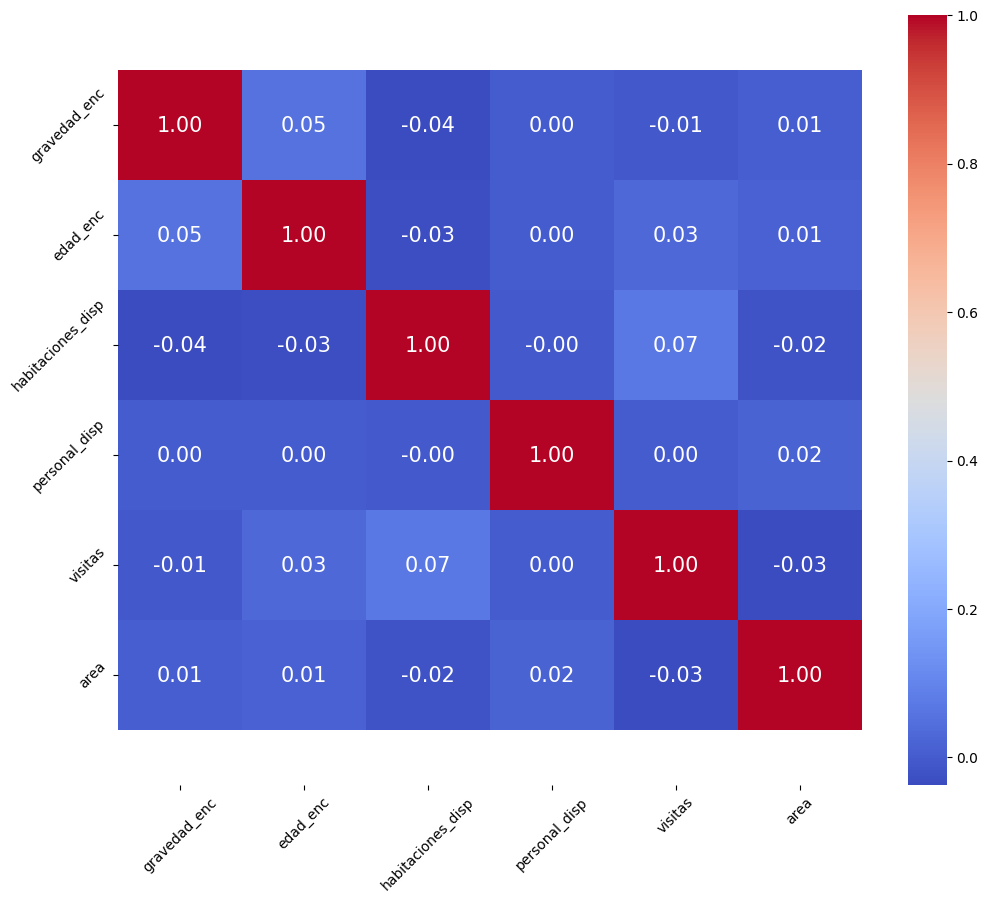

In [243]:
corr = df_train[['gravedad_enc', 'edad_enc','habitaciones_disp', 'personal_disp','visitas','area']].corr()
plot_corre_heatmap(corr)

In [11]:
df_train.columns

Index(['habitaciones_disp', 'area', 'doctor', 'personal_disp', 'visitas',
       'seguro', 'deposito', 'target', 'gravedad_enc', 'edad_enc'],
      dtype='object')

In [53]:
df_sub = df_train[['habitaciones_disp', 'area', 'doctor', 'personal_disp','edad_enc','target','deposito']]

***

## Probamos modelos de clasificación
##### Regresion Logistica

In [83]:
X = df_train.drop(['target'],axis = 1)
y = df_train['target']

In [84]:
# Separamos nuestros datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [85]:
# Importamos la clase que contiene el algoritmo

from sklearn.linear_model import LogisticRegression

# Instanciamos y entrenamos el modelo

clf = LogisticRegression()

clf.fit(X,y)

c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. 
# Ya ahondaremos con mayor especificidad en las métricas de clasificación en la clase 3

from sklearn.metrics import accuracy_score, recall_score

# Predecimos

y_pred = clf.predict(X)

# Evaluamos

print('El score del modelo es:', accuracy_score(y, y_pred))

El score del modelo es: 0.6004512195121952


##### Arbol de decisión

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier
#Le pasamos el nivel de profundidad maximo (prepodamos el arbol) con el max_depth y con el random_state la forma de aleatoriedad que queremos

clf = DecisionTreeClassifier(max_depth = 10, random_state = 42) 

In [88]:
# Entrenamos el modelo

clf.fit(X.values,y.values)

# Predecimos

y_pred = clf.predict(X.values)

In [89]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.7243121951219512


In [90]:
print(clf.classes_)
print(clf.n_classes_)
print(clf.feature_importances_)

['0' '1']
2
[4.62352584e-02 2.68778145e-01 4.13582317e-04 5.84036944e-06
 8.40831172e-03 3.43137449e-05 7.67100953e-02 8.46031335e-03
 5.90954140e-01]


##### Random Forest
Vamos con un modelo mas complejo

In [91]:
X = df_train.drop(['target'], axis = 1)
y = df_train['target']

In [92]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Elegimos variables de entrenamiento (empezamos con dos) y separamos las etiquetas

#columnas_entrenamiento = ['MaxTemp', 'Humidity3pm']
X = df_train.drop(['target'],axis = 1)
y = df_train['target']

In [95]:
# Instanciamos el modelo

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [96]:
# Evaluamos

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9999790940766551
0.7439674796747967


In [97]:
clf.oob_score_

0.7418710801393729

In [76]:
clf.feature_importances_

array([0.06286468, 0.09358825, 0.0563747 , 0.1050004 , 0.050961  ,
       0.01421449, 0.44239037, 0.01550526, 0.15910086])

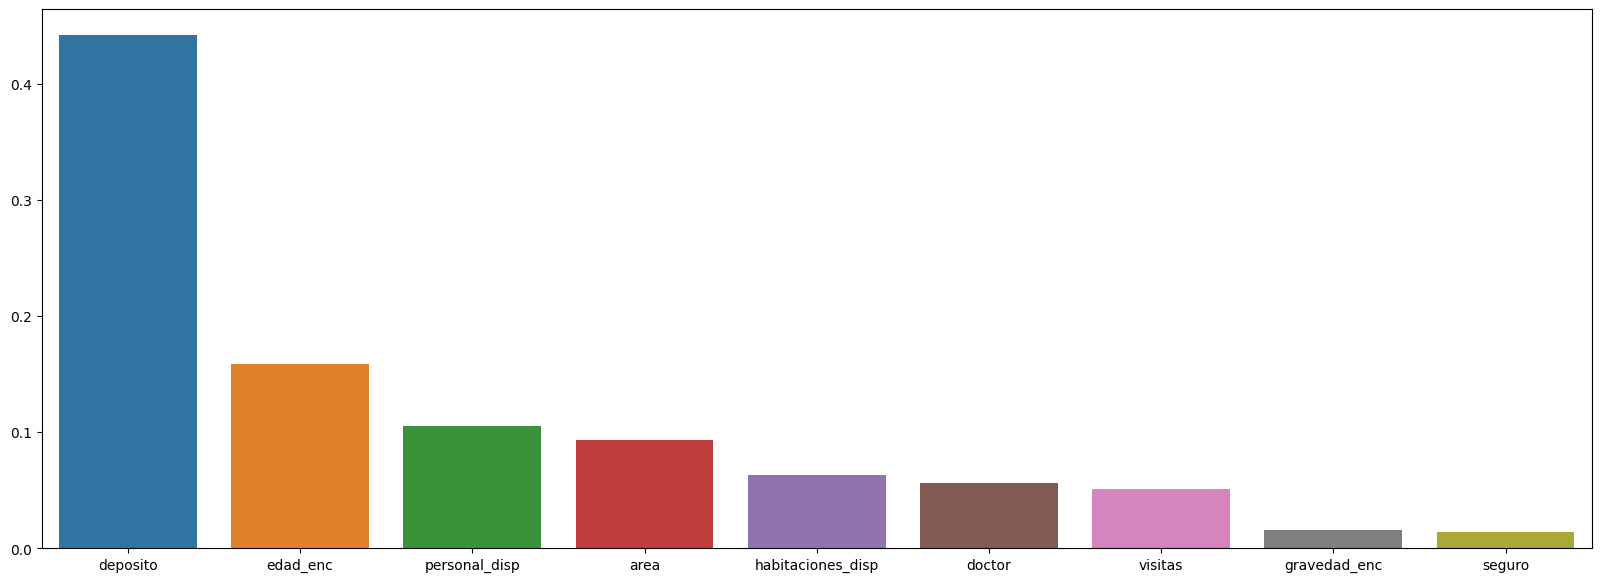

In [98]:
#Graficamos la importancia de las features
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (20,7))
sns.barplot(x = columns[indices], y = importances[indices])
plt.show()

In [31]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

In [281]:
# Elegimos, aleatoriamente, uno de los árboles del bosque

clf_tree = clf.estimators_[50]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1224821422,
 'splitter': 'best'}

In [282]:
#Probamos un random forest con x arboles, en este caso 50 arboles
import time

comienzo = time.time()
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)
fin = time.time() - comienzo

print(f'Tardó {round(fin)} segundos')

Tardó 198 segundos


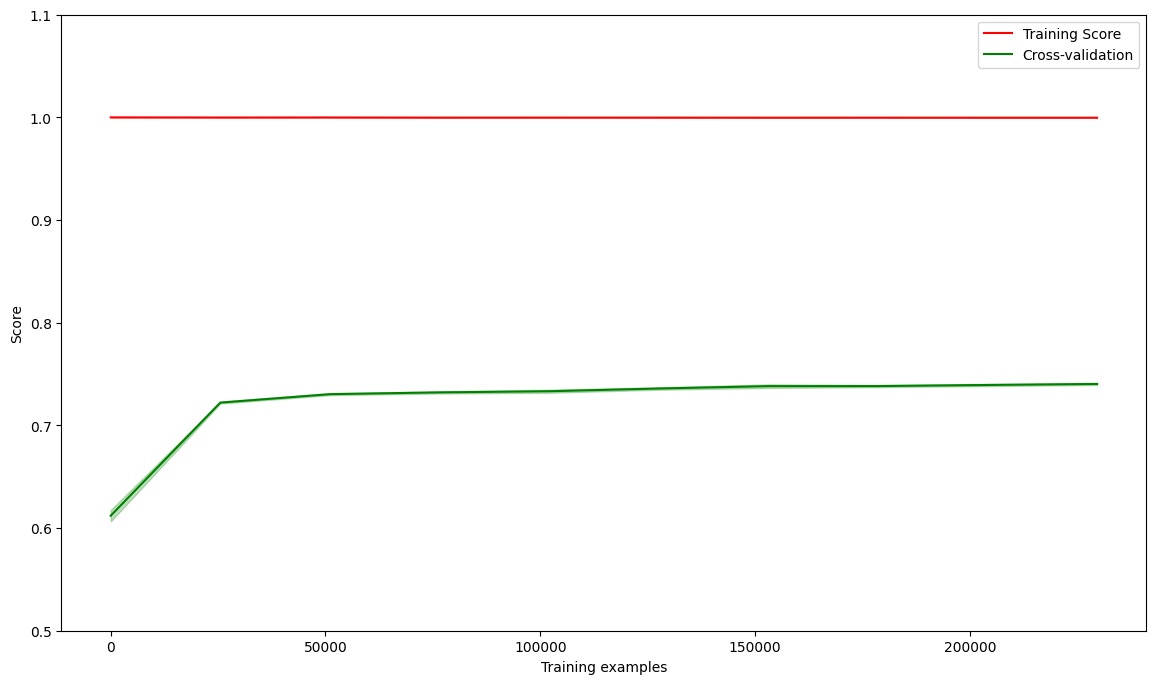

In [283]:
# Graficamos la curva de aprendizaje
#Muestra el score de la cross-validation y el del entrenamiento de un estimador variando la cantidad de muestras de set de entrenamiento.

plt.figure(figsize = (14,8))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.legend(['Training Score','Cross-validation'])
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.show()

### Utilizamos el ensamble Bagging para el arbol de decision
Prediccion 1

In [104]:
#Importamos el modelo
from sklearn.ensemble import BaggingClassifier

modelo1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1)
modelo1.fit(X_train, y_train)
y_train_pred = modelo1.predict(X_train)
y_test_pred = modelo1.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

c:\Users\homer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
pred = modelo1.predict(df_test)
df_prediccion1 = pd.DataFrame(pred)

NotFittedError: This BaggingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [101]:
df_prediccion1

,0
0,0
1,1
2,1
3,1
4,1
...,...
89995,0
89996,1
89997,0
89998,1


In [102]:
df_prediccion1.columns = ["pred"]
df_prediccion1.to_csv("BlasCollias.csv", index = False)

### Aplicamos el GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [49]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8]} #Podemos probar 'min_samples_split':[0.05,0.10], 'min_samples_leaf':[0.05,0.10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = 'accuracy')#precision#recall

In [50]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [51]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [52]:
y_pred = clf.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Test:', accuracy_score(y_pred,y_test))

Accuracy sobre conjunto de Test: 0.7126422764227642


##### XGBOOST
Ejemplos: https://github.com/tqchen/xgboost/tree/master/demo/guide-python

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Instanciamos el modelo

clf_xgb = xgb.XGBClassifier(n_estimators=50,
                            seed=42, use_label_encoder= True)
                            
# Entrenamos
clf_xgb.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields seguro

In [224]:
# Predecimos

y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)

# Evaluamos
print('Accuracy en train:', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy en test:', metrics.accuracy_score(y_test, y_test_pred))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields seguro